## Практическое задание 6. Градиентный бустинг ~~своими руками~~

Поздравляю! Это финальное упражнение в нашем курсе. Проявите все своё старание, терпение и опыт, чтобы выполнить его.  
Теперь вы многое знаете из машинного обучения и для вас не составит сложности попробовать разные алгоритмы, новые библиотеки и применить их к реальной задаче.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

__Задание 1. (0.5 балла)__

Мы будем использовать данные соревнования [Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk/data).  

* Загрузите таблицу **application_train.csv**;
* Запишите в Y столбец с целевой переменной;
* Удалите ненужные столбцы (для этого воспользуйтесь описанием);
* Определите тип столбцов и заполните пропуски - стратегия произвольная;
* Разбейте выборку в соотношении 70:30 с random_state=0.

Так как в данных значительный дисбаланс классов, в качестве метрики качества везде будем использовать площадь под precision-recall кривой.

In [4]:
applic = pd.read_csv('application_train.csv')

In [5]:
y = applic['TARGET'].copy()

In [6]:
X = applic.copy()
X = applic.drop(applic.iloc[:, 43:92],axis = 1)
X = applic.drop(applic.iloc[:, 35:40],axis = 1)
X = X.drop(columns=['SK_ID_CURR', 'AMT_GOODS_PRICE', 'TARGET'])
X.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Unaccompanied,Working,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Unaccompanied,Working,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
X.dtypes

NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 114, dtype: object

In [8]:
X = X.fillna(0)
X.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Unaccompanied,Working,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Unaccompanied,Working,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X_numerical = X.loc[:, X.dtypes != object]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_numerical.to_numpy(), y.to_numpy(), test_size=0.3, random_state=1)

__Задание 2. (1.5 балла)__

Также мы будем использовать две реализации градиентного бустинга: [LightGBM](https://lightgbm.readthedocs.io/en/stable/Python-API.html) и [Catboost](https://catboost.ai/en/docs/), которые вам необходимо самостоятельно изучить и установить, используя команды:  
`!pip install lightgb`  
`!pip install catboost`  
Обучите реализации градиентного бустинга LightGBM и Catboost на вещественных признаках без подбора параметров. 
Почему получилась заметная разница в качестве? 

В этом и последующих экспериментах необходимо измерять время обучения моделей.

In [11]:
#!pip install lightgbm

In [12]:
#!pip install catboost

In [13]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import average_precision_score

In [12]:
%%time
lgbm_model = LGBMClassifier(verbose= -100)
lgbm_model.fit(X_train, y_train)

CPU times: user 8.63 s, sys: 96.4 ms, total: 8.72 s
Wall time: 2.03 s


LGBMClassifier(verbose=-100)

In [13]:
y_lgbm = lgbm_model.predict_proba(X_test)[:, 1]
print('lgbm classifier score:', average_precision_score(y_test, y_lgbm))

lgbm classifier score: 0.23101202237751134


In [14]:
%%time
cat_model = CatBoostClassifier(logging_level='Silent')
cat_model.fit(X_train, y_train)

CPU times: user 3min 30s, sys: 5.15 s, total: 3min 36s
Wall time: 33.5 s


In [15]:
y_cat = cat_model.predict_proba(X_test)[:, 1]
print('catboost classifier score:', average_precision_score(y_test, y_cat))

catboost classifier score: 0.23578597179635788


__Задание 3. (2 балла)__

Подберите с CV=3 оптимальные параметры алгоритмов, изменяя:

* глубину деревьев;
* количество деревьев;
* темп обучения;
* оптимизируемый функционал.

Проанализируйте соотношения глубины и количества деревьев в зависимости от алгоритма.

In [14]:
from sklearn.model_selection import GridSearchCV

In [57]:
cat_params = {'learning_rate': [0.01, 0.04, 0.08], 
          'depth': [3, 5, 10], 
          'num_trees': [10, 50, 200]}

In [58]:
%%time
cat_model = CatBoostClassifier(logging_level='Silent')
cat_gs = GridSearchCV(cat_model, cat_params, cv=3, 
                  scoring='average_precision', verbose=0)
cat_gs.fit(X_train, y_train)

CPU times: user 49min 53s, sys: 47.2 s, total: 50min 40s
Wall time: 11min 20s


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f0b452960a0>,
             param_grid={'depth': [3, 5, 10],
                         'learning_rate': [0.01, 0.04, 0.08],
                         'num_trees': [10, 50, 200]},
             scoring='average_precision')

In [59]:
gs.best_params_

{'depth': 5, 'learning_rate': 0.08, 'num_trees': 200}

In [65]:
%%time
cat_model = CatBoostClassifier(logging_level='Silent', depth=5,
                              learning_rate=0.08, num_trees=200)
cat_model.fit(X_train, y_train)

CPU times: user 36.3 s, sys: 487 ms, total: 36.8 s
Wall time: 7.63 s


In [66]:
y_cat = cat_model.predict_proba(X_test)[:, 1]
print('catboost classifier score:', average_precision_score(y_test, y_cat))

catboost classifier score: 0.23479475846310358


In [52]:
lgbm_params = {'learning_rate': [0.01, 0.04, 0.08], 
               'max_depth': [3, 5, 10, 100, 1000], 
               'n_estimators': [5, 10, 50, 100, 500, 1000]}

In [53]:
%%time
lgbm_model = LGBMClassifier(verbose= -100)
gs_lgbm = GridSearchCV(lgbm_model, lgbm_params, cv=3, 
                       scoring='average_precision', verbose=0)
gs_lgbm.fit(X_train, y_train)

CPU times: user 55min 24s, sys: 27.4 s, total: 55min 51s
Wall time: 14min 6s


GridSearchCV(cv=3, estimator=LGBMClassifier(verbose=-100),
             param_grid={'learning_rate': [0.01, 0.04, 0.08],
                         'max_depth': [3, 5, 10, 100, 1000],
                         'n_estimators': [5, 10, 50, 100, 500, 1000]},
             scoring='average_precision')

In [54]:
gs_lgbm.best_params_

{'learning_rate': 0.04, 'max_depth': 3, 'n_estimators': 1000}

**чем меньше глубина, тем больше деревьев надо обучить**

__Задание 4. (3.5 балла)__

Добавьте категориальные признаки к вещественным следующими способами:

* как OHE признаки;
* как счетчики со сглаживанием.

При подсчете счетчиков запрещается использование циклов. 

На получившихся датасетах подберите параметры у каждого из алгоритмов. Как меняется время, необходимое для обучения модели в зависимости от способа кодирования? Сравните полученные результаты с встроенными методами обработки категориальных признаков. 

In [51]:
X_ohe = pd.get_dummies(X)

In [52]:
X_train_ohe, X_test_ohe = train_test_split(X_ohe, test_size=0.3, random_state=0)

In [53]:
%%time
cat_model_ohe = CatBoostClassifier(depth=5, num_trees=200,
                               learning_rate=0.08, verbose=False)
cat_model_ohe.fit(X_train_ohe, y_train)

CPU times: user 33.7 s, sys: 535 ms, total: 34.2 s
Wall time: 4.51 s


In [54]:
y_cat_ohe = cat_model_ohe.predict_proba(X_test_ohe)[:, 1]
print('cat classifier score:', average_precision_score(y_test, y_cat_ohe))

cat classifier score: 0.07963237732671254


In [57]:
#X_train_ohe

In [59]:
%%time
lgbm_model = LGBMClassifier(max_depth=3, n_estimators=1000,
                            learning_rate=0.04, verbose=-100)
lgbm_model.fit(X_train_ohe.to_numpy(), y_train)

CPU times: user 24.9 s, sys: 187 ms, total: 25.1 s
Wall time: 6.65 s


LGBMClassifier(learning_rate=0.04, max_depth=3, n_estimators=1000, verbose=-100)

In [60]:
y_lgbm_ohe = lgbm_model.predict_proba(X_test_ohe.to_numpy())[:, 1]
print('cat classifier score:', average_precision_score(y_test, y_lgbm_ohe))

cat classifier score: 0.08041482406303155


In [62]:
X['TARGET'] = y
X_count = X.copy()
for column in X:
    if(X[column].dtypes == object):
        X_count[column] = X[column].map((X.groupby(column)['TARGET'].sum() + 1) / 
                              (X.groupby(column).size() + 1))
X = X.drop(columns='TARGET')

In [63]:
X_count = X_count.drop(columns=['TARGET'])

In [64]:
X_train_count, X_test_count = train_test_split(X_count, test_size=0.3, random_state=0)

In [66]:
%%time
cat_model_count = CatBoostClassifier(depth=5, num_trees=200,
                               learning_rate=0.08, verbose=False)
cat_model_count.fit(X_train_count, y_train)

CPU times: user 33.9 s, sys: 650 ms, total: 34.5 s
Wall time: 4.55 s


In [67]:
y_cat_count = cat_model_count.predict_proba(X_test_count)[:, 1]
print('cat classifier score:', average_precision_score(y_test, y_cat_count))

cat classifier score: 0.08124496269861074


In [69]:
%%time
lgbm_model_count = LGBMClassifier(max_depth=3, n_estimators=1000,
                            learning_rate=0.04, verbose=-100)
lgbm_model_count.fit(X_train_count.to_numpy(), y_train)

CPU times: user 24.3 s, sys: 263 ms, total: 24.5 s
Wall time: 6.46 s


LGBMClassifier(learning_rate=0.04, max_depth=3, n_estimators=1000, verbose=-100)

In [ ]:
y_lgbm_ohe = lgbm_model.predict_proba(X_test_ohe.to_numpy())[:, 1]
print('cat classifier score:', average_precision_score(y_test, y_lgbm_ohe))

__Задание 5. (1 балл)__

Реализуйте блендинг подобранных в предыдущем задании моделей и сравните качество.

In [64]:
y_blend = (y_cat_count + y_cat_ohe) / 2.0
print('blending score:', average_precision_score(y_test, y_blend))

blending score: 0.08035863148279491


__Задание 6. (1.5 балла)__

В задании 3 вы подобрали гиперпараметры для LightGBM и CatBoost на вещественных признаках. Визуализируйте важности признаков, посчитанные этими алгоритмами, в виде горизонтального bar-plot (отсортируйте признаки по убыванию важности, подпишите названия признаков по оси y).

Для каждого из двух алгоритмов удалите неважные признаки (обычно по bar-plot хорошо видно порог на важность, с которого начинается хвост неважных признаков) и обучите ту же модель на получившихся данных. Сильно ли упало качество при удалении признаков, которые модель считает неважными?

In [15]:
cat_model = CatBoostClassifier(logging_level='Silent', depth=5,
                              learning_rate=0.08, num_trees=200)
cat_model.fit(X_train, y_train)
feat_imp = pd.DataFrame({'imp': cat_model.feature_importances_, 'col': X_numerical.columns})
feat_imp = feat_imp.sort_values(by=['imp'])

Text(0.5, 1.0, 'Feature Importance Catboost')

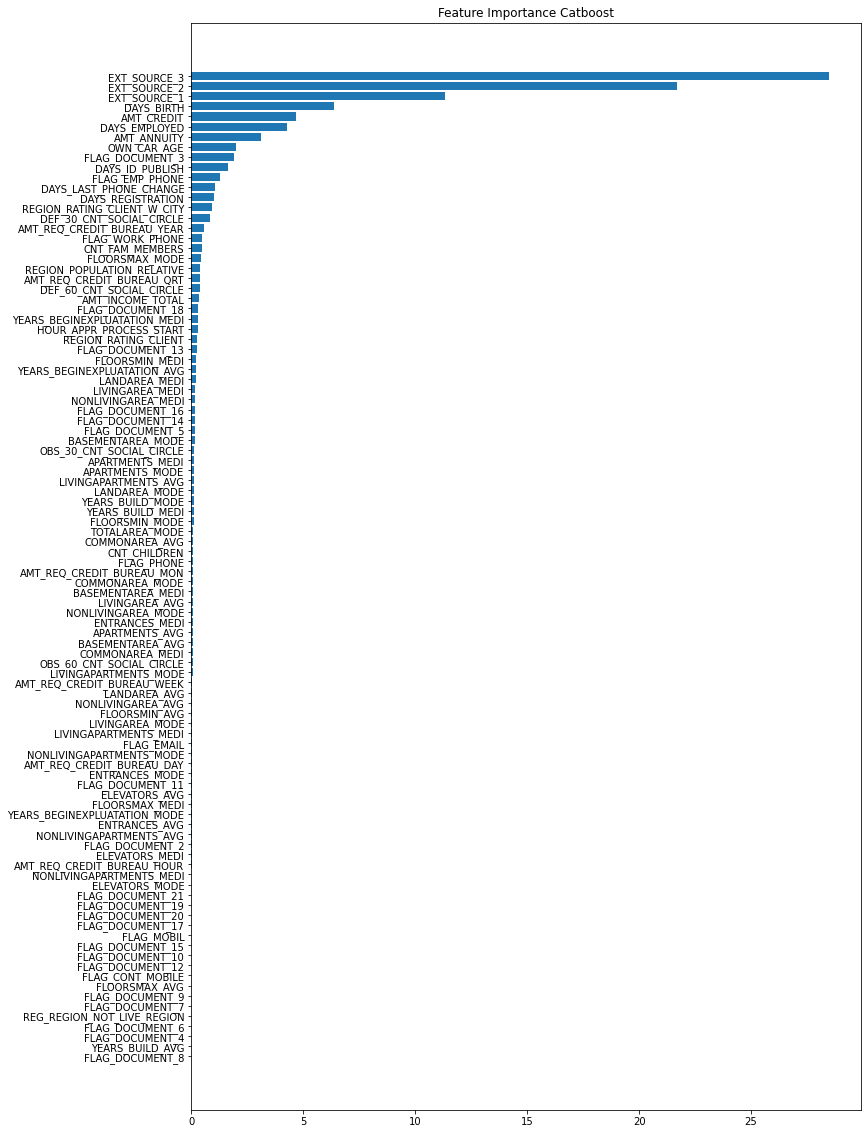

In [30]:
feature_importance_cat = cat_model.feature_importances_
sorted_idx = np.argsort(feature_importance_cat)
feature_importance_cat = feature_importance_cat[sorted_idx]
feature_importance_cat_name = np.array(X_numerical.columns[sorted_idx])

fig = plt.figure(figsize=(12, 20))
plt.barh(range(len(sorted_idx)), feature_importance_cat, align='center')
plt.yticks(range(len(sorted_idx)), feature_importance_cat_name)
plt.title('Feature Importance Catboost')

In [32]:
feature_importance_cat_name[len(feature_importance_cat_name)-15:len(feature_importance_cat_name)]

array(['DEF_30_CNT_SOCIAL_CIRCLE', 'REGION_RATING_CLIENT_W_CITY',
       'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_EMP_PHONE',
       'DAYS_ID_PUBLISH', 'FLAG_DOCUMENT_3', 'OWN_CAR_AGE', 'AMT_ANNUITY',
       'DAYS_EMPLOYED', 'AMT_CREDIT', 'DAYS_BIRTH', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3'], dtype=object)

In [46]:
X_numerical_cut = X_numerical[feature_importance_cat_name[len(feature_importance_cat_name)-15:len(feature_importance_cat_name)]]

X_numerical_cut_train, X_numerical_cut_test, y_c_train, y_c_test = train_test_split(X_numerical_cut.to_numpy(),
                                                                y.to_numpy(), 
                                                                test_size=0.3, 
                                                                random_state=1)

cat_model.fit(X_numerical_cut_train, y_c_train)


In [49]:
y_cat_count = cat_model.predict_proba(X_numerical_cut_test)[:, 1]
print('cat classifier score:', average_precision_score(y_c_test, y_cat_count))

cat classifier score: 0.23311129125825109
